                                                                                                Michael Gonzalez
                                                                                Side Project with Python and Seaborn

# Data Visualization of iPhone Health App Data with Python and Seaborn

## Importing the libraries and data (Pandas, Seaborn and Matplotlib)

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns


# import CSV
steps = pd.read_csv(r"C:\\Users\\gonzm200\\Documents\\raw_data\\StepCount.csv")
steps.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Kevin's iPhone,9.3,"<<HKDevice: 0x1c4280820>, name:iPhone, manufac...",StepCount,count,2016-04-09 14:47:16 -0500,2016-04-09 14:17:53 -0500,2016-04-09 14:23:02 -0500,34
1,Kevin's iPhone,9.3,"<<HKDevice: 0x1c428e290>, name:iPhone, manufac...",StepCount,count,2016-04-09 14:47:16 -0500,2016-04-09 14:23:02 -0500,2016-04-09 14:23:20 -0500,14
2,Kevin's iPhone,9.3,"<<HKDevice: 0x1c4280960>, name:iPhone, manufac...",StepCount,count,2016-04-09 14:47:16 -0500,2016-04-09 14:33:17 -0500,2016-04-09 14:33:33 -0500,8
3,Kevin's iPhone,9.3,"<<HKDevice: 0x1c409a770>, name:iPhone, manufac...",StepCount,count,2016-04-09 15:14:57 -0500,2016-04-09 15:02:56 -0500,2016-04-09 15:03:58 -0500,8
4,Kevin's iPhone,9.3,"<<HKDevice: 0x1c42875d0>, name:iPhone, manufac...",StepCount,count,2016-04-09 16:17:15 -0500,2016-04-09 15:36:42 -0500,2016-04-09 15:40:53 -0500,130


## Extract  the necessary columns and rename them.

In [2]:
steps = steps[['startDate', 'endDate', 'value']]
steps.columns = ['start', 'end', 'steps']

## Remove the time zone from the date string, and convert to them to datetime objects. 

In [3]:
steps.start = pd.to_datetime(steps.start.apply(lambda x: x[:-6]))
steps.end = pd.to_datetime(steps.end.apply(lambda x: x[:-6]))

steps.head()

,start,end,steps
0,2016-04-09 14:17:53,2016-04-09 14:23:02,34
1,2016-04-09 14:23:02,2016-04-09 14:23:20,14
2,2016-04-09 14:33:17,2016-04-09 14:33:33,8
3,2016-04-09 15:02:56,2016-04-09 15:03:58,8
4,2016-04-09 15:36:42,2016-04-09 15:40:53,130


In [4]:
hourly = steps.copy()
hourly['time'] = hourly.start + (hourly.end - hourly.start)/2
del hourly['start'], hourly['end']
hourly = hourly.groupby(hourly.time.dt.strftime("%Y-%m-%d %H:00")).sum()

hourly.to_csv("hourly_steps.csv")
hourly.head()

,steps
time,
2016-04-09 14:00,56
2016-04-09 15:00,152
2016-04-09 16:00,120
2016-04-09 17:00,322
2016-04-09 20:00,25


## Getting the daily steps 

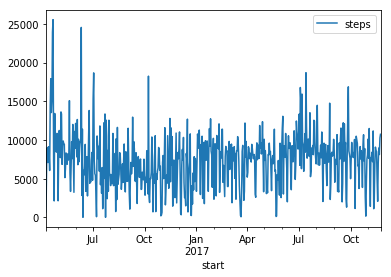

In [5]:
daily = steps.groupby(steps.start.dt.normalize()).sum()
daily.head()

daily.plot()

In [6]:
daily['dayofweek'] = daily.index.strftime('%A')
daily.head()

,steps,dayofweek
start,,
2016-04-09,701,Saturday
2016-04-10,3140,Sunday
2016-04-11,8827,Monday
2016-04-12,9013,Tuesday
2016-04-13,7085,Wednesday


## Creating a box plot of the daily steps  

Text(0,0.5,'Steps')

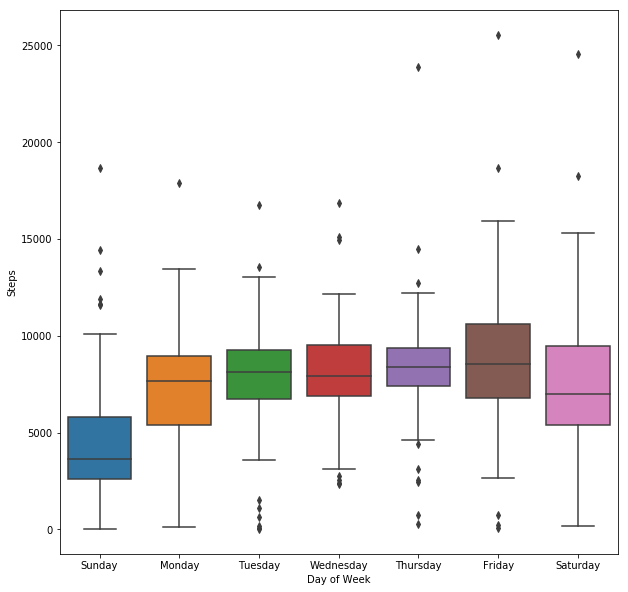

In [7]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(x='dayofweek', y='steps', data=daily, order=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax.set_xlabel("Day of Week")
ax.set_ylabel("Steps")